In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.integrate import odeint
from scipy import signal

from mpmath import *
from sympy import *
from sympy.solvers import solve, nonlinsolve

# Example 1

$ \dot{x} = \sin{x}$

In [2]:
X, t = symbols("X t")

# Define EDO to solve: x' = sin(x)
eq = X(t).diff(t)- sin(X(t))

# Solve Equation
sol=dsolve(eq, X(t))

print(sol)

[Eq(X(t), -acos((-exp(2*C1 + 2*t) - 1)/(exp(2*C1 + 2*t) - 1)) + 2*pi), Eq(X(t), acos((-exp(2*C1 + 2*t) - 1)/(exp(2*C1 + 2*t) - 1)))]


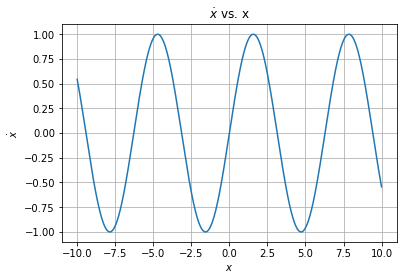

In [3]:
# x limits
xi = -10
xf = 10
Nx = 1000

x, xstep = np.linspace(xi, xf , Nx, retstep=True)

dx = np.sin(x)

plt.close()
plt.title(r'$\dot{x}$ vs. x ')
plt.plot(x, dx,"-")
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.grid()
plt.show()

In [4]:
X = symbols('X', real=True)

eq = sin(X)

sol1 = solve([X >= -10, X <= 10, eq ], X)

print(sol1)

(-10 <= X) & (X <= 10) & (Eq(X, 0) | Eq(X, pi) | Eq(X, 2*pi))


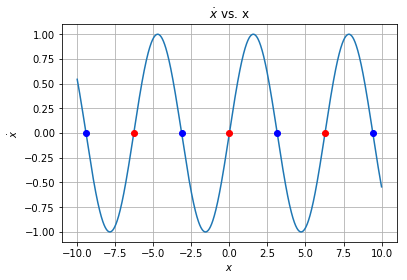

In [5]:
# x limits
xi = -10
xf = 10
Nx = 1000

x, xstep = np.linspace(xi, xf , Nx, retstep=True)
dx = np.sin(x)

x_stable = np.array([-3*np.pi, -np.pi, np.pi, 3*np.pi])
dx_stable = np.zeros(len(x_stable))

x_unstable = np.array([-2*np.pi, 0, 2*np.pi])
dx_unstable = np.zeros(len(x_unstable))

plt.close()
plt.title(r'$\dot{x}$ vs. x ')
plt.plot(x, dx,"-", x_stable, dx_stable, 'bo', x_unstable, dx_unstable, 'ro')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.grid()
plt.show()

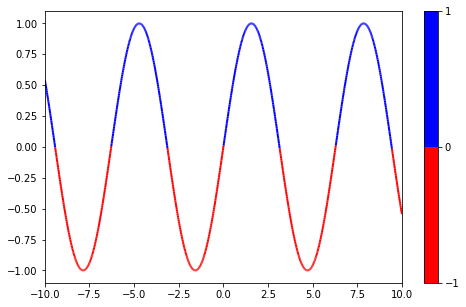

In [6]:
plt.close()

# x limits
xi = -10
xf = 10
Nx = 1000

x, xstep = np.linspace(xi, xf , Nx, retstep=True)

dx = np.sin(x)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, dx]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig = plt.figure(figsize=(8,5))
axes = plt.gca()

# Use a boundary norm instead
cmap = ListedColormap(['r', 'b'])
norm = BoundaryNorm([-1, 0.0, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dx)
lc.set_linewidth(2)
line = axes.add_collection(lc)
fig.colorbar(line, ax=axes)

axes.set_xlim(x.min(), x.max())
axes.set_ylim(-1.1, 1.1)
plt.show()

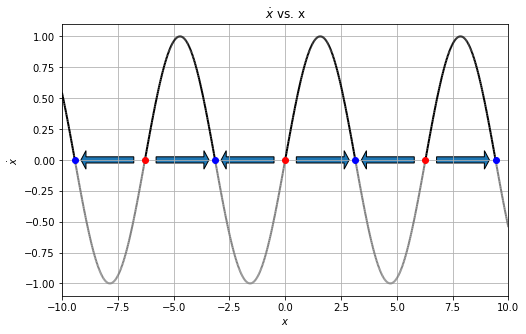

In [7]:
plt.close()

# x limits
xi = -10
xf = 10
Nx = 1000

# Data
x, xstep = np.linspace(xi, xf , Nx, retstep=True)
dx = np.sin(x)

# Stable fixed points
x_stable = np.array([-3*np.pi, -np.pi, np.pi, 3*np.pi])
dx_stable = np.zeros(len(x_stable))

# Unstable fixed points
x_unstable = np.array([-2*np.pi, 0, 2*np.pi])
dx_unstable = np.zeros(len(x_unstable))

# Segments
points = np.array([x, dx]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(8,5))
axes = plt.gca()

# Use a boundary norm instead
cmap = ListedColormap(['gray', 'black'])
norm = BoundaryNorm([-1.0, 0.0, 1.0], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dx)
lc.set_linewidth(2)
line = axes.add_collection(lc)

axes.plot(x_stable, dx_stable, 'bo', x_unstable, dx_unstable, 'ro')

Dx = x_stable[1] - x_unstable[0]

for i in range(len(x_unstable)):
    axes.arrow(x_unstable[i]+0.5, 0.0, Dx -1.0 , 0.0, width=0.05)
    
for i in range(len(x_unstable)):
    axes.arrow(x_unstable[i]- 0.5, 0.0, - Dx +1.0 , 0.0, width=0.05)

axes.set_title(r'$\dot{x}$ vs. x ')
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$\dot{x}$')
axes.set_xlim(x.min(), x.max())
axes.set_ylim(-1.1, 1.1)
axes.grid()

plt.show()